# Souper-duper predictive model

## Prepare data

In [212]:
import pandas as pd
import os

In [213]:
path = os.path.join('data', 'soup_data.csv')
df = pd.read_csv(path)
df.head()

,date,locA,locB,total,month,day_of_week,day_of_month,season
0,2018-02-03,30,15,45,February,Saturday,3,Winter
1,2018-02-05,30,17,47,February,Monday,5,Winter
2,2018-02-24,25,9,34,February,Saturday,24,Winter
3,2018-03-03,30,15,45,March,Saturday,3,Spring
4,2018-03-05,30,12,42,March,Monday,5,Spring


In [214]:
variables = [
    'date',
    'month',
    'day_of_week',
    'day_of_month',
    'season',
    #'precip_intensity_max',
    #'precip_intensity_avg',
    #'wind_speed_max',
    #'wind_speed_avg',
    #'gust_max',
    #'gust_avg',
    #'temp_min',
    #'temp_max',
    #'temp_avg',
    #'temp_day',
    #'temp_night',
    #'humidity'
]

In [216]:
X = df[variables]
y = df['total']
X.head()

,date,month,day_of_week,day_of_month,season
0,2018-02-03,February,Saturday,3,Winter
1,2018-02-05,February,Monday,5,Winter
2,2018-02-24,February,Saturday,24,Winter
3,2018-03-03,March,Saturday,3,Spring
4,2018-03-05,March,Monday,5,Spring


In [217]:
def day2int(day: str):
    ''' Convert a day to an integer. '''
    days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    days = {day: idx for (idx, day) in enumerate(days)}
    return days.get(day.lower())
    
def month2int(month: str):
    ''' Convert a month to an integer. '''
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 
              'august', 'september', 'october', 'november', 'december']
    months = {month: idx for (idx, month) in enumerate(months)}
    return months.get(month.lower())

def season2int(season: str):
    ''' Convert a season to an integer. '''
    seasons = ['winter', 'spring', 'summer', 'autumn']
    seasons = {season: idx for (idx, season) in enumerate(seasons)}
    return seasons.get(season.lower())

def date2dayofyear(date: str):
    ''' Convert at date of the YYYY-MM-DD format
        to the day of the year. '''
    from calendar import monthrange
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    
    day_of_year = 0
    for m in range(1, month):
        day_of_year += monthrange(year, m)[1]
    day_of_year += day
    
    return day_of_year

In [218]:
day2int('Wednesday'), month2int('december'), season2int('AuTUMN'), date2dayofyear('2019-02-05')

(2, 11, 3, 36)

In [219]:
X.loc[:, 'day_of_week'] = X.loc[:, 'day_of_week'].apply(day2int)
X.loc[:, 'month'] = X.loc[:, 'month'].apply(month2int)
X.loc[:, 'season'] = X.loc[:, 'season'].apply(season2int)
X.loc[:, 'day_of_year'] = X.loc[:, 'date'].apply(date2dayofyear)
X = X.drop(labels = ['date'], axis = 1)
X.head()

,month,day_of_week,day_of_month,season,day_of_year
0,1,5,3,0,34
1,1,0,5,0,36
2,1,5,24,0,55
3,2,5,3,1,62
4,2,0,5,1,64


## Data analysis

In [220]:
from matplotlib import pyplot as plt

In [225]:
df = X.copy()
df['total'] = y
df.head()

,month,day_of_week,day_of_month,season,day_of_year,total
0,1,5,3,0,34,45
1,1,0,5,0,36,47
2,1,5,24,0,55,34
3,2,5,3,1,62,45
4,2,0,5,1,64,42


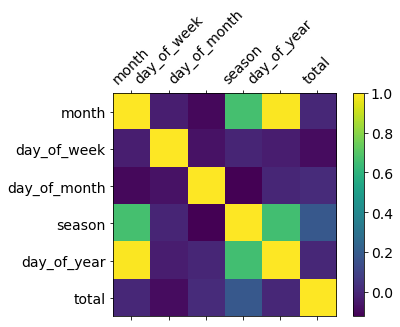

In [226]:
f = plt.figure(figsize=(6, 4))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## Model selection

In [237]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, svm, ensemble

### Linear regression

In [228]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
scores = cross_val_score(linreg, X, y, cv = 10)
-np.mean(scores)

4.222553468186134

### Ridge regression

In [231]:
ridge = linear_model.Ridge(alpha = 0.5)
ridge.fit(X, y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [246]:
scores = cross_val_score(ridge, X, y, cv = 10)
-np.mean(scores)

3.340522429720379

### Support vector machine

In [239]:
sv = svm.SVR(C = 1.0, gamma = 'scale')
sv.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [247]:
scores = cross_val_score(sv, X, y, cv = 10)
-np.mean(scores)

0.5204652836222405

### Random forest

In [241]:
forest = ensemble.RandomForestRegressor(n_estimators = 10)
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [248]:
scores = cross_val_score(forest, X, y, cv = 10)
-np.mean(scores)

0.31886603894029525

In [244]:
list(zip(X.columns, forest.feature_importances_))

[('month', 0.07088192178554942),
 ('day_of_week', 0.14559511477725756),
 ('day_of_month', 0.2016666568324988),
 ('season', 0.12490181878823721),
 ('day_of_year', 0.456954487816457)]